In [8]:
import numpy as np
import sys
sys.path.append('../util')
from mof_util import test_regressor, tune_regressor
from import_data import import_data
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from matplotlib import pyplot as plt

In [10]:
file_names = ['toacco_geo_chem_erase_mit_order.csv', 
              'toacco_geo_chem_mit_order.csv', 
              'toacco_geo2_mit_order.csv',
              'tobacco_geo_Gol.csv']

data_x, bulk_y, shear_y = import_data(file_names[1])

Import data: toacco_geo_chem_mit_order.csv
Geometry data shape: (3380, 14)
Bulk data shape: (3380,)
Shear data shape: (3380,)


ExtraTreesRegressor


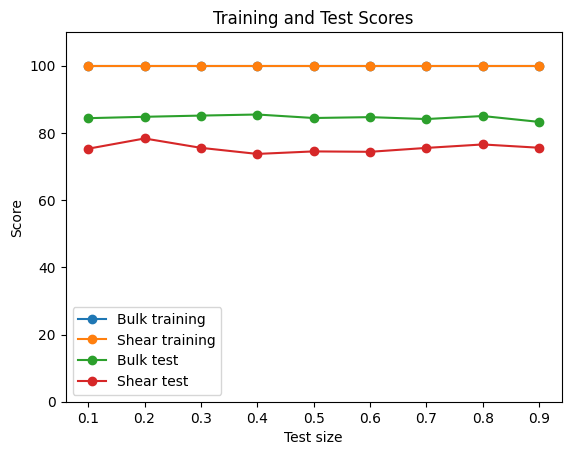

------------------------------
Best bulk test score: 85.48% at test_size = 0.4
Best shear test score: 78.35% at test_size = 0.2


In [3]:
extra_tree = ExtraTreesRegressor()
test_regressor(extra_tree, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

Bulk regression best parameters:
{'max_depth': 18, 'max_features': None, 'min_samples_split': 0.01, 'n_estimators': 100}
Shear regression best parameters:
{'max_depth': 18, 'max_features': None, 'min_samples_split': 0.01, 'n_estimators': 300}
ExtraTreesRegressor


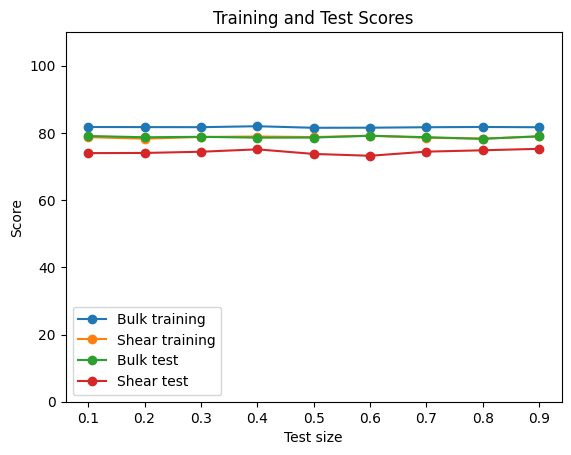

------------------------------
Best bulk test score: 79.16% at test_size = 0.6
Best shear test score: 75.27% at test_size = 0.9
ExtraTreesRegressor


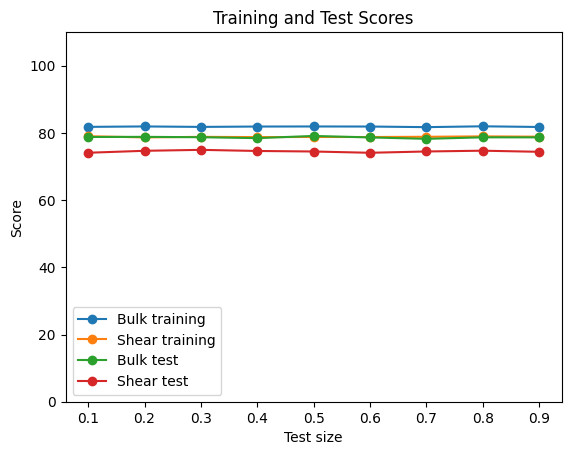

------------------------------
Best bulk test score: 79.1% at test_size = 0.5
Best shear test score: 74.96% at test_size = 0.3


In [4]:
extra_bulk, extra_shear = tune_regressor(extra_tree, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

GradientBoostingRegressor


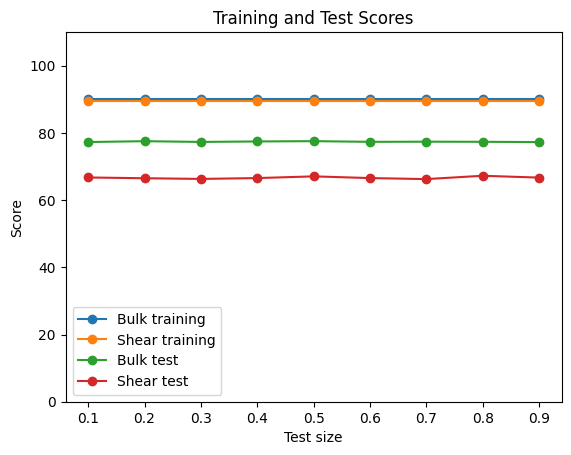

------------------------------
Best bulk test score: 77.55% at test_size = 0.5
Best shear test score: 67.25% at test_size = 0.8


In [5]:
gradient_boosting = GradientBoostingRegressor()
test_regressor(gradient_boosting, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

Bulk regression best parameters:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 200}
Shear regression best parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 100}
GradientBoostingRegressor


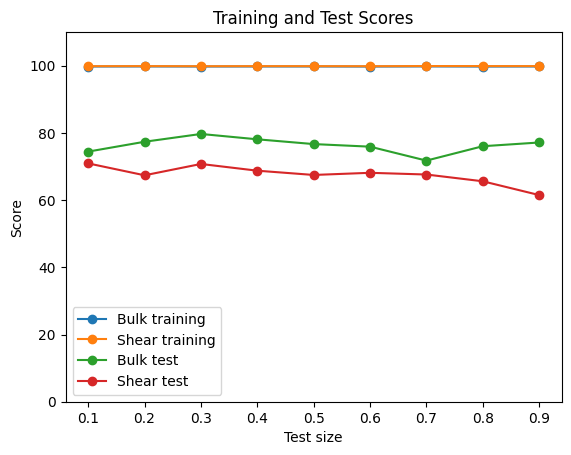

------------------------------
Best bulk test score: 79.69% at test_size = 0.3
Best shear test score: 70.93% at test_size = 0.1
GradientBoostingRegressor


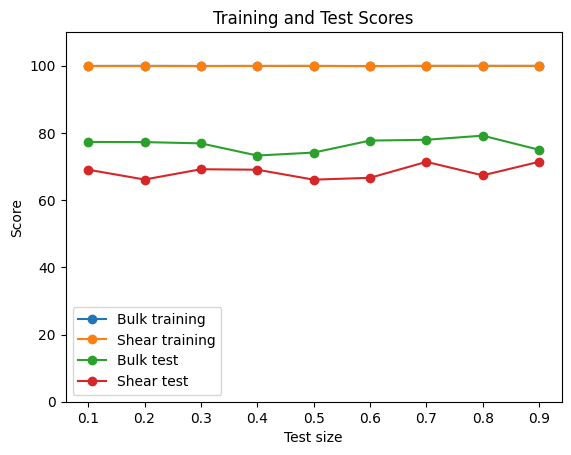

------------------------------
Best bulk test score: 79.19% at test_size = 0.8
Best shear test score: 71.41% at test_size = 0.9


(GradientBoostingRegressor(max_depth=15, max_features='sqrt',
                           min_samples_split=0.01, n_estimators=200),
 GradientBoostingRegressor(max_depth=None, max_features='sqrt',
                           min_samples_split=0.01))

In [6]:
tune_regressor(gradient_boosting, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

RandomForestRegressor


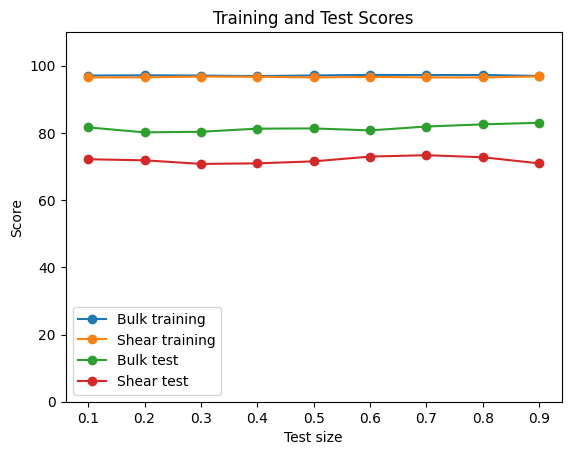

------------------------------
Best bulk test score: 83.01% at test_size = 0.9
Best shear test score: 73.37% at test_size = 0.7


In [7]:
random_forest = RandomForestRegressor()
test_regressor(random_forest, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

Bulk regression best parameters:
{'max_depth': 12, 'max_features': None, 'min_samples_split': 0.01, 'n_estimators': 150}
Shear regression best parameters:
{'max_depth': 18, 'max_features': None, 'min_samples_split': 0.01, 'n_estimators': 250}
RandomForestRegressor


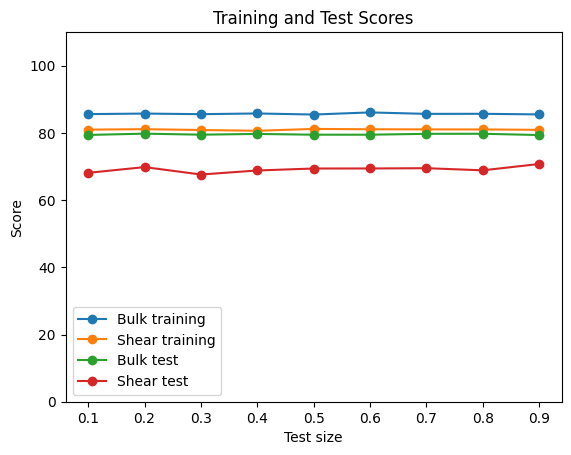

------------------------------
Best bulk test score: 79.78% at test_size = 0.2
Best shear test score: 70.75% at test_size = 0.9
RandomForestRegressor


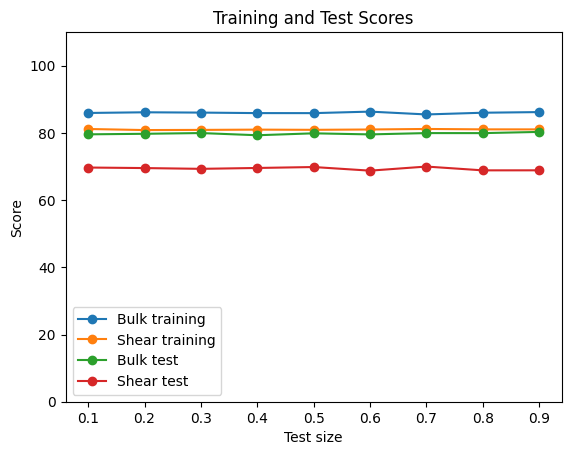

------------------------------
Best bulk test score: 80.3% at test_size = 0.9
Best shear test score: 69.99% at test_size = 0.7


(RandomForestRegressor(max_depth=12, max_features=None, min_samples_split=0.01,
                       n_estimators=150),
 RandomForestRegressor(max_depth=18, max_features=None, min_samples_split=0.01,
                       n_estimators=250))

In [8]:
tune_regressor(random_forest, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

LGBMRegressor


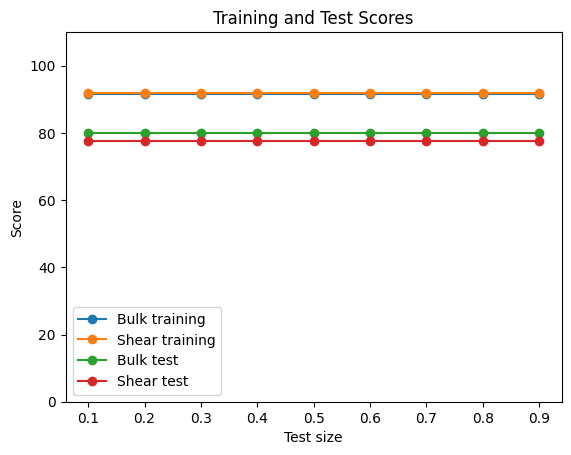

------------------------------
Best bulk test score: 80.01% at test_size = 0.1
Best shear test score: 77.56% at test_size = 0.1


In [3]:
from lightgbm import LGBMRegressor
LGBM_regressor = LGBMRegressor()
test_regressor(LGBM_regressor, data_x, bulk_y, shear_y, testsize=0.1, verbose=1)

Bulk regression best parameters:
{'max_depth': 9, 'n_estimators': 300, 'num_leaves': 21}
Shear regression best parameters:
{'max_depth': -1, 'n_estimators': 300, 'num_leaves': 41}
LGBMRegressor


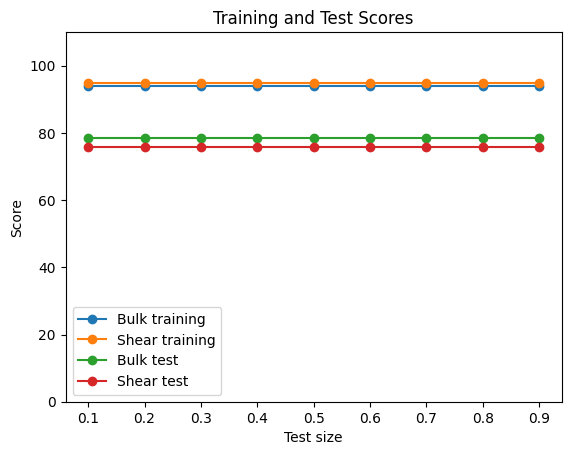

------------------------------
Best bulk test score: 78.44% at test_size = 0.1
Best shear test score: 75.89% at test_size = 0.1
LGBMRegressor


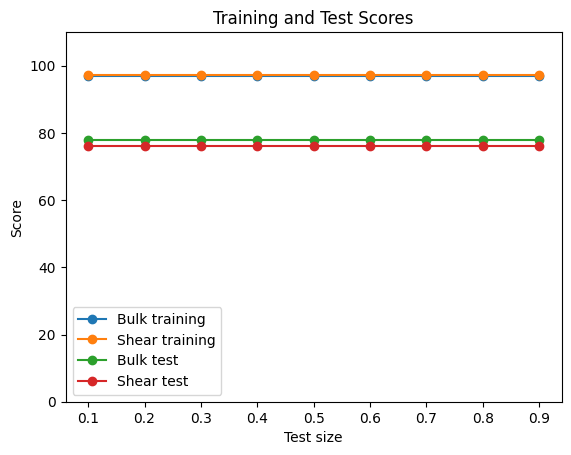

------------------------------
Best bulk test score: 78.01% at test_size = 0.1
Best shear test score: 76.2% at test_size = 0.1


(LGBMRegressor(max_depth=9, n_estimators=300, num_leaves=21),
 LGBMRegressor(n_estimators=300, num_leaves=41))

In [4]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [-1, 6, 9, 12, 15, 18],
    'num_leaves': [11, 21, 31, 41, 51],
}
tune_regressor(LGBM_regressor, data_x, bulk_y, shear_y, testsize=0.1, verbose=1, param_grid=param_grid)